# 15-1. 들어가며
현재 널리 사용되고 있는 가장 성공적인 인공지능 어플리케이션을 하나 꼽으라고 한다면, 단연코 신경망 기계 번역(Neural Machine Translation)일 것입니다. 이미 구글번역, 파파고 등 우리가 사용하고 있는 번역기의 수준은 놀라울 정도입니다. 인공지능을 통해 그토록 넘어서기 어렵던 언어의 장벽이 한층 낮아졌다는 것이 이제는 너무나 자연스럽기만 합니다.

오늘 우리가 배우게 될 `sequence-to-sequence`(seq2seq이라고 많이 부릅니다) 모델은 이러한 뉴럴 기계번역의 가능성을 한층 앞당긴 기념비적인 모델이라 할 수 있습니다. 물론 지금 엄청난 성능을 내고 있는 기계번역 모델에 사용되고 있지는 않습니다. 앞으로 배우게 될 최신 모델들에 비하면 seq2seq은 고전적이라고 할 수 있겠습니다만, 지금의 번역기 모델의 근간을 이루고 있는 중요한 아이디어를 제공하고 있습니다. 2014년 처음 나왔을 당시 sequence-to-sequence은 매우 깊은 인상을 남겼습니다. 딥러닝을 통해 어떤 복잡한 것(X)도 다른 것(Y)로 바꿀 수 있다라는 생각이 여러가지 X-to-Y 모델의 변종을 만들어 냈습니다. Image-to-Text , Voice-to-Text 등 다양한 아이디어가 나오고, 이를 통해 딥러닝 기술이 한단계 도약하는 계기가 되었습니다.

그러한 seq2seq 모델을 만들어 보면서, 번역기의 기본적인 아이디어에 대해서도 상세히 파악해 보겠습니다.

### 학습 목표
---
- 다양한 RNN의 구성을 알아보기
- 인코더와 디코더 구조의 필요성 이해하기
- 교사 강요(teacher forcing)의 원리 알기
- 훈련 단계와 추론 단계(inference)의 차이 알기

# 15-2. 기계 번역 이야기
### Step 1. 기계 번역 이야기
---
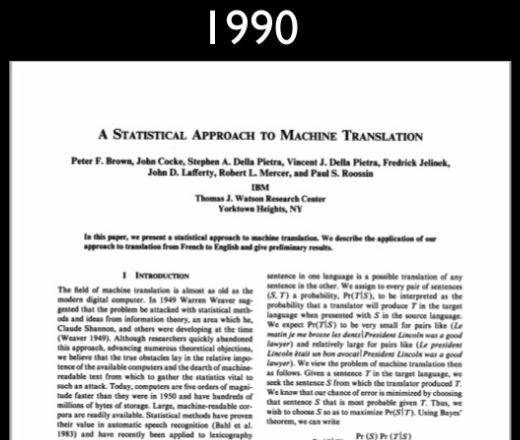
[기계 번역의 역사 출처 : [https://www.intechopen.com/online-first/machine-translation-and-the-evaluation-of-its-quality](https://www.intechopen.com/online-first/machine-translation-and-the-evaluation-of-its-quality)]    
1940년대부터 1980년대까지의 기계 번역은 __규칙 기반의 기계 번역(Rule-based Machine Translation)__이 주를 이뤘습니다. 예를 들어, 2차 세계 대전 시절 미국이 러시아어를 영어로 번역하고자 했을때, 러시아 문장에서 단어 하나, 하나의 의미를 분석하고, 그 단어들이 어떻게 문법적으로 연결되었는지를 분석하고, 그 다음 구조 상의 의미를 분석한 뒤에, 그제서야 영어와 의미적으로 맞게 단어들을 분리하고, 마지막으로 영어 문법에 맞게 다시 단어들의 순서를 맞추고… 이야기만 들어도 굉장히 복잡했을 것 같습니다.


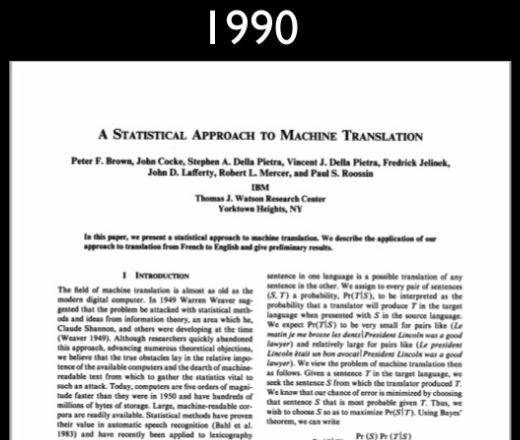
[기계 번역의 통계적 접근이라는 1990년에 나온 IBM의 논문 출처 : [https://www.slideshare.net/alopezfoo/edinburgh-mt-class-history](https://www.slideshare.net/alopezfoo/edinburgh-mt-class-history)]
1980년 후반에 들어서 IBM에서 규칙 기반에서 벗어나려는 시도가 있었습니다. 언어학 기반의 규칙이 아닌 통계로 구현하려는 시도였는데요. 이를 __통계적 기계 번역(Statistical Machine Translation)__이라고 합니다. 1980년대 당시 규칙 기반의 접근이 얼마나 답답했는지 그 팀의 리더 프레데리 제리넥은 이 당시 "매번 내가 언어학자를 해고할 때마다, 언어 인식기의 성능이 올라갔다." 라는 말을 남겼다는 소문이 있죠. 이 방법은 2010년 중반까지 주요한 접근으로 사용되었습니다.

통계 기반 번역에 여러 머신 러닝이 사용되었지만 딥 러닝은 아니었습니다. 몇 차례 인공 신경망으로 번역을 제안하는 논문은 있었지만, 훈련 데이터도 적고 신경망의 크기도 작아서 주목받지 못했죠. 그러나 2010년 중반에 들어 알고리즘과 하드웨어의 발전으로 딥 러닝이 빛을 발하면서 달라습니다.

구글은 2016년 9월. 자신들의 구글 번역기에 __신경망 기계 번역(Neural Machine Translation, NMT)__을 도입하면서 획기적인 성능 개선을 이뤘다고 발표했습니다. 통계 기반 번역에서 신경망 기계 번역으로 변경되면서, 한층 더 높은 수준의 번역 능력을 가질 수 있게 되었는데요. 이때 사용된 인공 신경망이 __seq2seq__입니다. (물론 실제로는 몇 가지 추가적인 메커니즘이 들어가있습니다.) 이번 챕터에서는 이 신경망 seq2seq를 구현해서 기계 번역기를 만들어볼거에요.

# 15-3. 시퀀스 처리하는 RNN
앞서 시퀀스 데이터를 처리하는 RNN에 대해서 배웠습니다. RNN은 어떻게 활용하느냐에 따라서 다양한 어플리케이션에서 사용할 수 있는데요.

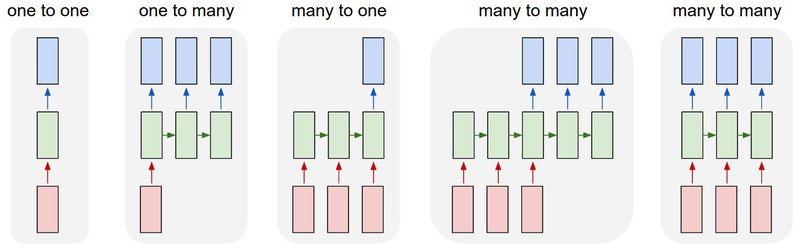
[출처 : http://karpathy.github.io/2015/05/21/rnn-effectiveness/]    

위의 그림은 다양한 RNN의 활용 방법을 보여주고 있습니다. 좌측부터 차례대로 1번부터 5번이라고 번호를 붙였다고 가장하고 설명해볼까요? 1번 one-to-one은 순환하지 않으므로 일반적인 피드 포워드 신경망입니다. 2번 one-to-many는 순환을 하기 시작하니까 본격적인 RNN이네요. 하나의 입력으로부터 다수의 출력을 내는 경우인데, 예를 들어 하나의 이미지를 받아서 이미지의 제목. 다시 말해 단어 시퀀스를 출력하는 이미지 캡셔닝(image captioning) 작업이 이에 속합니다.

2번과 반대처럼 보이는 3번 many-to-one은 시퀀스를 입력받아서 하나의 결과를 내는 RNN으로 텍스트 분류(text classification)에 사용할 수 있습니다. 가령, 스팸 메일 분류기라고 하면 메일을 입력받아서 이 메일이 '정상 메일'인지 '스팸 메일'인지를 결과를 알 수 있겠죠.

5번으로 가볼게요. 5번 many-to-many는 시퀀스를 입력받아 시퀀스를 출력하는데, 매 time step마다 바로 출력을 하는 구조에요. 이 구조는 입력 문장의 각 단어가 무엇인지를 알려주는 개체명 인식이나 품사 태깅에 사용할 수 있습니다.

이제 4번을 볼까요? many-to-many이지만 5번이랑 달라요. 입력을 받는 동안 출력을 내지 않다가 어느 time step부터 출력을 시작합니다. 아마 어떤 기준이 있는 모양이에요. 구현하기가 5번보다는 까다로울 것 같다는 생각이 듭니다.

사실, 기계 번역기 구현은 기본적으로 4번을 활용해야 해요. 그 이유는 __'사람 말은 끝까지 들어봐야한다'__라는 현인(?)들의 말과 연관이 있는데요. 번역 또는 통역이라고 하는 것은 전체 문장을 모두 읽거나 듣고나서야 할 수 있기 때문이죠. 번역이나 통역에 5번을 사용하면 아직 사람 말이 다 안 끝났는데 단어 하나를 들을 때마다 그 순간 번역한다는 뜻인데 그 최종 번역이 제대로 된 문장일리가 없겠죠?

![image.jpg](~/Pictures/E-15-4.seq2seq.max-800x600.jpg)

# 15-4. seq2seq
### seq2seq의 인코더-디코더 구조
앞서 번역기는 다양한 RNN의 유형 그림중에서도 4번을 사용한다고 했었죠? 사실 더 자세히 말하면 4번 그림보다 조금~ 더 복잡합니다. 아래의 그림은 번역기의 기본 구조인 seq2seq 입니다.

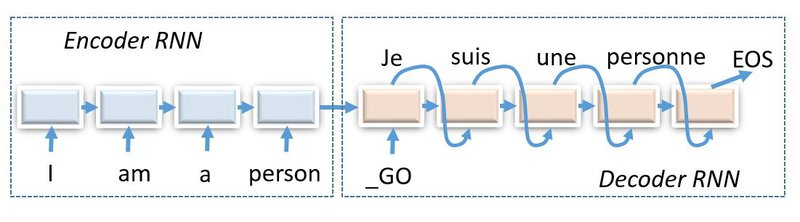

[출처 : https://notebooks.azure.com/anon-ssuccw/projects/2018-data-access/html/nlp_course/week04_seq2seq/practice.ipynb]    
seq2seq는 두 개의 RNN 아키텍처를 연결한 구조입니다. 입력 문장을 받는 RNN을 __인코더__라고 하고, 두번째 RNN을 __디코더__라고 합니다.

아래 그림에서 Encoder는 Feature Extractor의 역할을 합니다. 어떤 데이터 X를 해석하기 위한 저차원의 feature vector z를 만들어 냅니다. 반면에 Decoder는 저차원의 Feature z로부터 정보를 복원해서 다시 어떤 데이터 X′을 재생성하는 역할을 합니다.


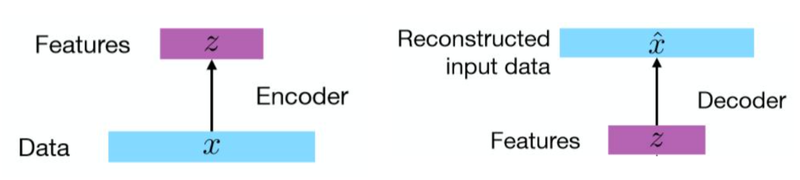
[[출처 : Stanford CS231n Lecture12.]]    
우리가 오늘 만들 seq2seq 모델은 위 인코더-디코더 모델에서 인코더와 디코더 모델이 모두 RNN인 경우라고 볼 수 있을 것입니다. 그렇다면 seq2seq의 feature vector는 무엇일까요? 바로 인코더 RNN이 입력문장을 해석해서 만들어 낸 hidden state 벡터일 것입니다. 즉, A언어의 문장 X를 z라는 hidden state로 해석한 후 z를 다시 B 언어의 문장 Y로 재생성하는 것입니다. 그러므로 인코더에서 필요한 것은 인코더의 마지막 time step의 hidden state입니다. 그리고 이를 두번째 RNN인 디코더에 전달합니다.

디코더는 인코더의 마지막 time step의 hidden state를 전달 받아 자신의 초기 hidden state로 하고, 출력 문장을 생성해내기 시작합니다. 여기서는 특수 문자를 사용해서 출력 문장의 시작과 종료를 알려주어야 합니다. 위의 그림에서는 _ GO와 EOS가 각각 시작 문자와 종료 문자에 해당합니다. 문헌에 따라서는 SOS와 EOS라고도 하는데, SOS는 start of sequence를 의미하며, EOS는 end of sequence를 의미합니다.

### Conditional Language Model
문장 생성기(Text Generator) 모델을 만들어 보았다면, 그러한 문장 생성기는 __언어 모델(Language Model)__을 구현한 것이라는 것을 알고 있을 것입니다.

언어 모델이란 n-1개의 단어 시퀀스 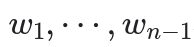 가 주어졌을 때, n번째 단어 wn 으로 무엇이 올지를 예측하는 확률 모델입니다. 파라미터 θ로 모델링하는 언어 모델을 다음과 같이 표현할 수 있습니다.
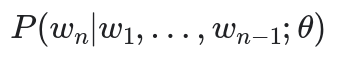
우리가 알고 있는 RNN 계열의 모델들은 이러한 언어 모델을 구현하기에 적합한 것들입니다.

그런데, 언어모델에 기반한 문장 생성기가 가지고 있는 한가지 문제점이 있습니다. 그것은 바로, [어떤 말을 만들고 싶은지를 제어할 수 없다]는 점입니다. RNN 모델이 확률적으로 그 다음 나올 단어들을 순차적으로 만들어 나가게 되는데, 그것을 상황에 맞게 제어할 수 있다면 아주 유용할 것입니다. 그래서 사람들은 위 언어모델을 확장해서 조건적 언어모델(Conditional Language Model)의 개념을 생각하게 됩니다. 말하자면 아래와 같은 형태가 될 것입니다.
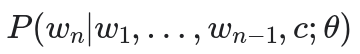
이 식과 다르게 c라는 것이 하나 더 붙었지요? 이 c를 이용해 기계에게 '아무 문장이나 만들지 말고 c에 적합한 문장을 만들어' 라고 주문하고 싶은 것입니다.

기계번역이야말로 가장 대표적인 Conditional Language Model의 사례가 될 것입니다. 'X라는 영어 문장을 Y라는 프랑스어 문장으로 번역해!' 라는 것은 바꾸어 말하면, '프랑스어 문장 Y를 만들어 봐, 단 그 문장은 영어로는 X라는 뜻이어야 해.'라는 뜻이 됩니다. 그런데 이 조건을 어떻게 문장생성기에 넣어 줄까요? 그렇습니다. 이 문장 X를 해석해서 c로 만드는 인코더를 또다른 RNN으로 만드는 것입니다. 그렇게 만든 
c를 다시 문장생성기인 디코더 RNN에 입력으로 넣어주는 모델을 만들어 낸 것이 바로 오늘 다루게 될 seq2seq인 것입니다.

# 15-5. 교사 강요(teacher forcing)
seq2seq는 훈련 과정과 테스트 과정에서의 동작 방식이 다르다는 특징이 있습니다. 이전 스텝의 그림을 보면 디코더 RNN은 이전 time step의 출력을 현재 time step의 입력으로 사용한다는 특징을 가지고 있습니다. 그런데 이는 테스트 과정에서의 이야기이고, 훈련 과정은 조금 다른 방식을 사용합니다. 그 이유는 훈련 과정에서 이전 time step이 잘못된 예측을 한다면 이를 입력으로 한 현재 time step의 예측도 잘못될 수 있기 때문입니다. 이런 상황이 반복되면 훈련 시간이 굉장히 늘어나게 됩니다.


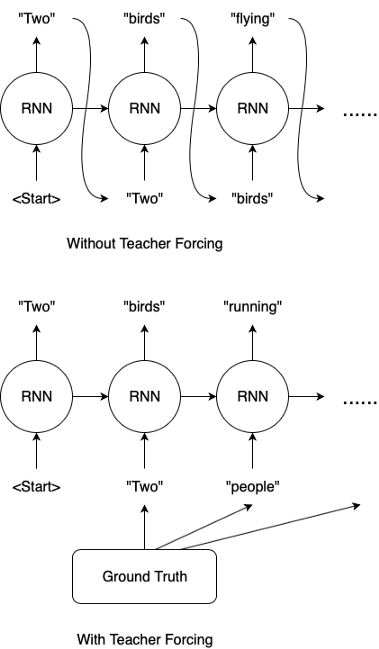
[출처 : https://towardsdatascience.com/what-is-teacher-forcing-3da6217fed1c]    
훈련 과정에서는 실제 정답 시퀀스를 알고 있는 상황이므로 이전 time step의 예측값을 현재 time step의 입력으로 사용하는 것이 아니라 이전 time step의 실제값으로 사용할 수 있습니다. 이 작업을 교사 강요(teacher forcing)이라고 합니다. 이 기법은 seq2seq 뿐 아니라 sequence 데이터의 생성모델에서 일반적으로 사용되는 기법이기도 합니다. 물론, 이는 모델이 훈련 데이터 외의 결과를 생성해내는 능력을 기르는데에 조금 방해가 될 수 있다는 단점도 존재합니다.

# 15-6. 단어 수준 vs 문자 수준
seq2seq는 __단어 수준(word level)__ 또는 __문자 수준(character level)__ 두 가지 방법으로 구현할 수 있습니다. 단어 수준이라고 함은 각 RNN의 time step의 입출력 단위가 단어 수준이라는 의미이고, 문자 수준이라 함은 RNN의 time step의 입출력 단위가 문자 수준. 영어에서는 알파벳 단위입니다.

실제 구현 자체는 문자 수준이 좀 더 쉬운데, 그 이유는 단어 수준 seq2seq의 경우 매 time step에서 디코더 RNN이 출력을 결정할 때, 훈련 데이터에 있는 전체 단어 집합의 수가 30만개라면 30만개 중 하나를 선택해야 하므로 출력층의 크기가 무려 30만이어야 합니다.

하지만 문자 수준으로 구현하면 영문자 알파벳은 26개에 불과하므로 출력층의 크기가 굉장히 작아집니다. 여기에 대, 소문자를 구분하지 않고 특수문자를 포함한다고 하더라도 출력층의 크기는 100을 넘지 않습니다.

그렇다면 단어 수준의 번역과 문자 수준의 번역 둘 중 어느 쪽이 더 유리할까요?

두 방법에는 장단점이 있습니다. 그리고 그 장단점은 서로 trade-off 관계이기도 합니다.

단어 수준의 번역을 위해서 사전을 구축한다고 생각해 봅시다. 가장 극단적인 경우에 해당하는 한국어의 예를 들어 봅시다.

먹다, 먹는다, 먹고, 먹지, 먹을까…..

'먹다'라는 단어 하나에 이렇게 많은 변종이 있고, 이 의미가 전부 아주 약간 다릅니다. 이렇게 따지면 엄청나게 큰 단어 사전이 필요하게 됩니다. 영어에도 이런 문제가 있겠지만 한국어에 비하면😏 그 변화가 그리 심하지는 않습니다. 또하나의 단어 수준의 접근의 어려움은 띄어쓰기의 문제입니다. 특히 띄어쓰기가 많이 생각되는 한국어, 일본어 같은 언어들에 있어 이러한 전처리가 큰 어려움의 원인이 됩니다.

그렇다면 문자 수준으로 번역하면 이런 문제가 없이 아주 깔끔하게 해결되겠죠? 그러나 단어를 문자 수준으로 쪼갠다는 것은 단어 안에 내재된 정보가 소실된다는 것을 의미합니다. 즉, 기계가 데이터를 통해 글자가 단어를 이루는 패턴까지 학습해 내야 한다는 것입니다. 그래서 충분한 데이터가 확보되지 않았다면 일반적으로 문자 수준의 번역이 단어 수준의 번역보다 품질이 떨어집니다.

하지만, 최신 자연어처리의 흐름은 단어 수준이나 문자 수준의 번역이 아닌, 그 사이의 subword 기반의 번역이 주를 이루고 있습니다. 이에 대해서는 심화 과정에서 자세히 다루게 될 것입니다.

---
이번 챕터에서는 전처리와 훈련 시간을 고려하여 문자 수준으로 구축해보겠습니다. 그리고 일단 문자 수준 번역기를 구축하고나면 단어 수준 모델로 변환하는 것은 굉장히 쉽기 때문에 이는 추후 독자들의 연습으로 남겨두겠습니다.

# 15-7. 번역기 만들기 (1) 데이터 전처리
이번 챕터에서 사용할 데이터는 https://www.manythings.org/anki/에서 다운로드 하겠습니다. 여기서는 프랑스어와 영어의 병렬 코퍼스인 fra-eng.zip을 다운받아 사용합니다. 가운데 쯤에 있으니 잘 찾아보시고 아니면 다음 명령어로 다운로드를 받아도 됩니다.
```sh
$ mkdir -p ~/aiffel/translator_seq2seq/data
$ mkdir -p ~/aiffel/translator_seq2seq/models
$ wget https://www.manythings.org/anki/fra-eng.zip
$ mv fra-eng.zip  ~/aiffel/translator_seq2seq/data
$ cd ~/aiffel/translator_seq2seq/data && unzip fra-eng.zip
```
이 파일의 압축을 풀면 fra.txt라는 파일이 존재하는데 이 파일이 우리가 사용할 훈련 데이터입니다.

우선 필요한 도구들을 임포트합니다.



In [3]:
import pandas as pd
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import numpy as np

1 Physical GPUs, 1 Logical GPUs


해당 파일을 데이터프레임으로 읽어옵니다.

In [4]:
import os
file_path = os.getenv('HOME')+'/aiffel/e/translator_seq2seq/data/fra.txt'
lines = pd.read_csv(file_path, names=['eng', 'fra', 'cc'], sep='\t')
print('전체 샘플의 수 :',len(lines))
lines.sample(5) #샘플 5개 출력

전체 샘플의 수 : 178009


,eng,fra,cc
56553,Is it raining right now?,Pleut-il à l'heure actuelle ?,CC-BY 2.0 (France) Attribution: tatoeba.org #1...
154407,It's an excellent method to relieve stress.,C'est une excellente méthode pour soulager le ...,CC-BY 2.0 (France) Attribution: tatoeba.org #2...
40982,Have yourself a drink.,Servez-vous un verre !,CC-BY 2.0 (France) Attribution: tatoeba.org #2...
151405,He likes being surrounded by young people.,Il aime être entouré de jeunes.,CC-BY 2.0 (France) Attribution: tatoeba.org #1...
85826,Mary had a girls' night out.,Marie a passé une soirée entre filles.,CC-BY 2.0 (France) Attribution: tatoeba.org #1...


세번째 열은 불필요하므로 제거하고, 훈련 데이터는 5만개의 샘플로 줄이겠습니다.

In [5]:
lines = lines[['eng', 'fra']][:50000] # 5만개 샘플 사용
lines.sample(5)

,eng,fra
27015,Was this your idea?,Était-ce votre idée ?
43934,"Open the door, please.","Ouvrez la porte, je vous prie !"
16351,Stop right there.,Arrête-toi juste là !
45943,Who's your girlfriend?,Qui est ta petite copine ?
2455,I'll try it.,Je l'essayerai.


seq2seq 동작을 위해서 디코더의 입력과 예측에는 시작 토큰 `<sos>`와 종료 토큰 `<eos>`가 필요합니다. 이번에는 각각` \t`와 `\n`을 사용하겠습니다. 두 토큰을 추가해줍니다.

In [6]:
# 시작 토큰과 종료 토큰 추가
sos_token = '\t'
eos_token = '\n'
lines.fra = lines.fra.apply(lambda x : '\t '+ x + ' \n')
print('전체 샘플의 수 :',len(lines))
lines.sample(5)

전체 샘플의 수 : 50000


,eng,fra
41281,He was about to start.,\t Il était sur le point de commencer. \n
39594,You are new students.,\t Vous êtes de nouveaux étudiants. \n
5850,I'll be ready.,\t Je serai prêt. \n
41616,I can hardly hear you.,\t Je t'entends avec grandes difficultés. \n
24170,I don't own a suit.,\t Je ne possède pas de costume. \n


이제 단어장(vocabulary)을 만들고, 각 단어에 부여된 고유한 정수로 텍스트 시퀀스를 정수 시퀀스로 변환하는 정수 인코딩 과정을 거치겠습니다. 이때 영어와 프랑스어는 사용하는 언어가 다르므로 단어장을 별도로 만들어줍니다. 그리고 정상적으로 정수 시퀀스로 변환되었는지 3개의 행을 출력합니다.



In [7]:
eng_tokenizer = Tokenizer(char_level=True)   # 문자 단위로 Tokenizer를 생성합니다. 
eng_tokenizer.fit_on_texts(lines.eng)               # 50000개의 행을 가진 eng의 각 행에 토큰화를 수행
input_text = eng_tokenizer.texts_to_sequences(lines.eng)    # 단어를 숫자값 인덱스로 변환하여 저장
input_text[:3]

[[19, 3, 8], [10, 5, 8], [10, 5, 8]]

In [8]:
fra_tokenizer = Tokenizer(char_level=True)   # 문자 단위로 Tokenizer를 생성합니다. 
fra_tokenizer.fit_on_texts(lines.fra)                 # 50000개의 행을 가진 fra의 각 행에 토큰화를 수행
target_text = fra_tokenizer.texts_to_sequences(lines.fra)     # 단어를 숫자값 인덱스로 변환하여 저장
target_text[:3]

[[11, 1, 19, 4, 1, 33, 1, 12],
 [11, 1, 3, 4, 13, 7, 5, 1, 33, 1, 12],
 [11, 1, 3, 4, 13, 7, 5, 14, 1, 12]]

단어장의 크기를 변수로 저장해줍니다. 0번 토큰을 고려하여 +1을 하고 저장해줍니다.

In [9]:
eng_vocab_size = len(eng_tokenizer.word_index) + 1
fra_vocab_size = len(fra_tokenizer.word_index) + 1
print('영어 단어장의 크기 :', eng_vocab_size)
print('프랑스어 단어장의 크기 :', fra_vocab_size)

영어 단어장의 크기 : 51
프랑스어 단어장의 크기 : 73


이제 영어 데이터와 프랑스어 데이터의 최대 길이를 각각 구해보겠습니다. 이는 패딩(`<pad>`)을 위함입니다. 모델에 입력될 영어, 프랑스어 시퀀스의 길이가 일정해야 하므로, 최대 길이로 맞추고 남는 시퀀스 뒷부분을 패딩으로 채우게 됩니다.

In [10]:
max_eng_seq_len = max([len(line) for line in input_text])
max_fra_seq_len = max([len(line) for line in target_text])
print('영어 시퀀스의 최대 길이', max_eng_seq_len)
print('프랑스어 시퀀스의 최대 길이', max_fra_seq_len)

영어 시퀀스의 최대 길이 23
프랑스어 시퀀스의 최대 길이 76


전체적인 통계 정보를 한꺼번에 출력해봅시다.

In [11]:
print('전체 샘플의 수 :',len(lines))
print('영어 단어장의 크기 :', eng_vocab_size)
print('프랑스어 단어장의 크기 :', fra_vocab_size)
print('영어 시퀀스의 최대 길이', max_eng_seq_len)
print('프랑스어 시퀀스의 최대 길이', max_fra_seq_len)

전체 샘플의 수 : 50000
영어 단어장의 크기 : 51
프랑스어 단어장의 크기 : 73
영어 시퀀스의 최대 길이 23
프랑스어 시퀀스의 최대 길이 76


인코더의 입력으로 사용되는 영어 시퀀스와 달리, 프랑스어 시퀀스는 2가지 버전으로 나누어 준비해야 합니다. 하나는 디코더의 출력과 비교해야 할 정답 데이터로 사용해야 할 원래 목적에 따른 것입니다. 그리고 다른 하나는 이전 스텝에서 언급했던 교사 강요(Teacher forcing)을 위해 디코더의 입력으로 사용하기 위한 것입니다.

이때, 디코더의 입력으로 사용할 시퀀스는 < eos >토큰이 필요가 없고, 디코더의 출력과 비교할 시퀀스는 < sos >가 필요가 없기 때문입니다. 가령, 영어로 'I am a person'이라는 문장을 프랑스어 'Je suis une personne'로 번역하는 번역기를 만든다고 해봅시다. 훈련 과정에서 디코더는 '< sos > Je suis une personne'를 입력받아서 'Je suis une personne < eos >'를 예측하도록 훈련되므로, 이런 방식으로 생성된 두가지 버전의 시퀀스를 준비해야 합니다.

In [12]:
encoder_input = input_text
# 종료 토큰 제거
decoder_input = [[ char for char in line if char != fra_tokenizer.word_index[eos_token] ] for line in target_text] 
# 시작 토큰 제거
decoder_target = [[ char for char in line if char != fra_tokenizer.word_index[sos_token] ] for line in target_text]

디코더의 입력과 출력을 각각 출력해봅시다.

In [13]:
print(decoder_input[:3])
print(decoder_target[:3])

[[11, 1, 19, 4, 1, 33, 1], [11, 1, 3, 4, 13, 7, 5, 1, 33, 1], [11, 1, 3, 4, 13, 7, 5, 14, 1]]
[[1, 19, 4, 1, 33, 1, 12], [1, 3, 4, 13, 7, 5, 1, 33, 1, 12], [1, 3, 4, 13, 7, 5, 14, 1, 12]]


디코더의 입력의 경우에는 숫자 12(< eos > 토큰)가 제거되었고, 디코더의 출력의 경우에는 숫자 11(< sos > 토큰)이 제거되었습니다. 이제 패딩을 진행합니다. 패딩을 진행하면 모든 샘플들의 길이가 정해준 길이로 동일하게 변환됩니다. 여기서는 아까 저장해두었던 가장 긴 샘플의 길이인 `max_eng_seq_len`, `max_fra_seq_len`를 각각 사용하였습니다.

이렇게 되면 영어 데이터의 모든 샘플들은 `max_eng_seq_len`의 길이를 가지고, 프랑스어의 모든 샘플들은 `max_fra_seq_len`의 길이가 되겠죠?

In [14]:
encoder_input = pad_sequences(encoder_input, maxlen = max_eng_seq_len, padding='post')
decoder_input = pad_sequences(decoder_input, maxlen = max_fra_seq_len, padding='post')
decoder_target = pad_sequences(decoder_target, maxlen = max_fra_seq_len, padding='post')
print('영어 데이터의 크기(shape) :',np.shape(encoder_input))
print('프랑스어 입력데이터의 크기(shape) :',np.shape(decoder_input))
print('프랑스어 출력데이터의 크기(shape) :',np.shape(decoder_target))

영어 데이터의 크기(shape) : (50000, 23)
프랑스어 입력데이터의 크기(shape) : (50000, 76)
프랑스어 출력데이터의 크기(shape) : (50000, 76)


모든 샘플들의 길이가 동일하게 변환된 것을 알 수 있습니다. 모든 샘플들의 길이가 동일하게 변환되는 과정에서 정해준 길이보다 짧은 데이터들은 뒤에 0(`<pad>`)으로 채워집니다. 인코더의 샘플 하나만 출력해볼까요?

In [15]:
print(encoder_input[0])

[19  3  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]


앞서 [19, 3, 8]이라는 3개의 단어만 있단 샘플이 뒤에 0이 채워지면서 `max_eng_seq_len`의 값인 23의 길이를 가지게 되었습니다. 이제 각 정수에 대해서 벡터화 방법으로 원-핫 인코딩을 선택합니다.

In [16]:
encoder_input = to_categorical(encoder_input)
decoder_input = to_categorical(decoder_input)
decoder_target = to_categorical(decoder_target)
print('영어 데이터의 크기(shape) :',np.shape(encoder_input))
print('프랑스어 입력데이터의 크기(shape) :',np.shape(decoder_input))
print('프랑스어 출력데이터의 크기(shape) :',np.shape(decoder_target))

영어 데이터의 크기(shape) : (50000, 23, 51)
프랑스어 입력데이터의 크기(shape) : (50000, 76, 73)
프랑스어 출력데이터의 크기(shape) : (50000, 76, 73)


원-핫 인코딩을 하고나서의 데이터의 크기는 (샘플의 수 × 샘플의 길이 × 단어장의 크기)가 됩니다. 원-핫 인코딩은 각 정수를 단어장의 크기를 가지는 원-핫 벡터로 인코딩하는 과정이기 때문입니다.

마지막으로, 훈련과정의 validation을 위해 위에서 생성한 데이터 50000건 중 3000건만 검증데이터로 삼고, 나머지를 학습데이터로 삼겠습니다.

In [17]:
n_of_val = 3000

encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

print('영어 학습데이터의 크기(shape) :',np.shape(encoder_input))
print('프랑스어 학습 입력데이터의 크기(shape) :',np.shape(decoder_input))
print('프랑스어 학습 출력데이터의 크기(shape) :',np.shape(decoder_target))

영어 학습데이터의 크기(shape) : (50000, 23, 51)
프랑스어 학습 입력데이터의 크기(shape) : (50000, 76, 73)
프랑스어 학습 출력데이터의 크기(shape) : (50000, 76, 73)


# 15-8. 번역기 만들기 (2) 모델 훈련하기
이번 실습은 기본적으로 케라스 창시자 프랑수아 숄레의 케라스의 seq2seq 구현 가이드 게시물인 [A ten-minute introduction to sequence-to-sequence learning](https://blog.keras.io/a-ten-minute-introduction-to-sequence-to-sequence-learning-in-keras.html)를 참고로 하였습니다.

우선 필요한 도구들을 임포트합니다.

In [18]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense
from tensorflow.keras.models import Model
print('⏳')

⏳


먼저 인코더를 설계해볼까요? 인코더는 디코더보다 상대적으로 간단합니다. LSTM 셀을 설계하고나서 문장을 입력받으면 LSTM 셀이 마지막 time step의 hidden state와 cell state를 전달받아서 저장해줍니다. 앞서 인코더의 마지막 hidden state를 디코더의 첫번째 hidden state로 사용한다고 했었지요? 일반적인 기본 RNN의 경우에는 그것이 맞지만, 기본 RNN보다 좀 더 복잡한 LSTM의 경우에는 hidden state뿐만 아니라, cell sate라는 것이 존재합니다.

그래서 인코더 LSTM 셀의 마지막 time step의 hidden state와 cell state를 디코더 LSTM의 첫번째 hidden state와 cell state로 전달해주어야 합니다.

In [19]:
# 입력 텐서 생성.
encoder_inputs = Input(shape=(None, eng_vocab_size))
# hidden size가 256인 인코더의 LSTM 셀 생성
encoder_lstm = LSTM(units = 256, return_state = True)
# 디코더로 전달할 hidden state, cell state를 리턴. encoder_outputs은 여기서는 불필요.
encoder_outputs, state_h, state_c = encoder_lstm(encoder_inputs)
# hidden state와 cell state를 다음 time step으로 전달하기 위해서 별도 저장.
encoder_states = [state_h, state_c]

위의 코드를 한 줄, 한 줄 파악해볼게요.

첫번째 줄 : 우선 LSTM의 입력 텐서를 정의해줍니다. 입력 문장을 저장하게 될 변수 텐서입니다.

두번째 줄 : 256의 hidden_size를 가지는 LSTM 셀을 만들어줍니다. LSTM의 수용력(capacity)를 의미합니다. return_state = True를 해서 hidden state와 cell state를 리턴받을 수 있도록 합니다.

세번째 줄 : 입력 텐서를 입력으로 마지막 time step의 hidden state와 cell state를 결과로 받습니다.

네번째 줄 : 마지막 time step의 hidden state와 cell state를 encoder_states라는 하나의 변수에 저장해뒀습니다. 이를 디코더에 전달하면 되겠네요.

이제 디코더를 설계해볼까요? 디코더도 인코더랑 몇 가지 세부 사항을 제외하고 거의 똑같습니다.

In [20]:
# 입력 텐서 생성.
decoder_inputs = Input(shape=(None, fra_vocab_size))
# hidden size가 256인 인코더의 LSTM 셀 생성
decoder_lstm = LSTM(units = 256, return_sequences = True, return_state=True)
# decoder_outputs는 모든 time step의 hidden state
decoder_outputs, _, _= decoder_lstm(decoder_inputs, initial_state = encoder_states)

세번째 줄을 보면 디코더의 인자로 initial_state가 추가되었는데요. LSTM 셀의 초기 상태를 정의해줄 수 있는 인자입니다. 여기서는 이전에 저장한 인코더의 마지막 time step의 hidden state와 cell state를 사용하였습니다. 디코더의 출력층을 설계해줍니다.

In [21]:
decoder_softmax_layer = Dense(fra_vocab_size, activation='softmax')
decoder_outputs = decoder_softmax_layer(decoder_outputs)

매 time step마다의 다중 클래스 분류 문제이므로 프랑스어 단어장으로부터 한 가지 문자만 선택하도록 합니다. Dense의 인자로 프랑스어 단어장의 크기를 기재하고, 활성화 함수로 소프트맥스 함수를 사용. 최종적으로 인코더와 디코더를 연결해서 하나의 모델로 만들어줍니다. Model의 Input과 Output의 정의를 유심히 살펴 주세요.

In [23]:
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.compile(optimizer="rmsprop", loss="categorical_crossentropy")
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.compile(optimizer="rmsprop", loss="categorical_crossentropy")
model.fit(x=[encoder_input_train, decoder_input_train], y=decoder_target_train, \
          validation_data = ([encoder_input_test, decoder_input_test], decoder_target_test),
          batch_size=128, epochs=50)
# model.summary()
plot_model(model, to_file='model.png')

TypeError: int() argument must be a string, a bytes-like object or a number, not 'NoneType'

# 15-9. 번역기 만들기 (3) 모델 테스트하기
seq2seq는 훈련할 때와 테스트 단계의 동작이 다릅니다. 이를 위해서 테스트 단계의 디코더 모델은 설계를 다시 해줄 필요가 있습니다. 물론 이전에 학습된 디코더 모델의 레이어는 그대로 사용합니다. 왜 이렇게 번거로운 과정이 생기는 것일까요? Text Generator 모델을 만들어 보신 분이라면 알 수 있습니다. 훈련시에는 학습해야 할 타겟 문장을 디코더 모델의 입력, 출력 시퀀스로 넣어 주고, 디코더 모델이 타겟 문장을 한꺼번에 출력하게 할 수 있습니다. 그러나 테스트 단계에서는 그럴 수가 없습니다. 하나의 문장을 만들어 내기 위해 루프를 돌면서 단어를 하나씩 차례차례 예측해서, 예측한 단어가 다시 다음 단어를 예측할 때 사용되는 입력으로 재사용되는 과정이 진행되기 때문입니다.

정리하면, 테스트 단계에서의 디코더의 동작 순서는 아래와 같습니다.

1. 인코더에 입력 문장을 넣어 마지막 time step의 hidden, cell state를 얻는다.
2. 토큰인 '\t'를 디코더에 입력한다.
3. 이전 time step의 출력층의 예측 결과를 현재 time step의 입력으로 한다.
4. 3을 반복하다가 토큰인 '\n'가 예측되면 이를 중단한다.    

이를 구현하기 위해서 훈련 과정에서와의 차이점은 이전 time step의 출력층의 예측 결과를 현재 time step의 입력으로 사용하는 단계를 추가하기 위해서 루프를 돌며 디코더의 LSTM 셀을 마치 수동 제어하는 느낌으로 설계해야 합니다. 코드가 좀 더 길어지게 되는데요.

우선 인코더를 정의합니다. encoder_inputs와 encoder_states는 이미 정의한 것들을 재사용합니다.



In [ ]:
encoder_model = Model(inputs = encoder_inputs, outputs = encoder_states)
encoder_model.summary()

이제 디코더를 설계합니다.

In [ ]:
# 이전 time step의 hidden state를 저장하는 텐서
decoder_state_input_h = Input(shape=(256,))
# 이전 time step의 cell state를 저장하는 텐서
decoder_state_input_c = Input(shape=(256,))
# 이전 time step의 hidden state와 cell state를 하나의 변수에 저장
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

# decoder_states_inputs를 현재 time step의 초기 상태로 사용.
# 구체적인 동작 자체는 def decode_sequence()에 구현.
decoder_outputs, state_h, state_c = decoder_lstm(decoder_inputs, initial_state = decoder_states_inputs)
# 현재 time step의 hidden state와 cell state를 하나의 변수에 저장.
decoder_states = [state_h, state_c]

훈련 과정에서의 디코더보다 코드가 좀 더 길어졌죠? 이전 time step의 출력 결과를 현재 time step의 입력으로 사용하기 위해서 디코더 LSTM 셀의 동작을 좀 더 세분화해서 구현했습니다. 동작 자체는 이후에 구현할 def decode_sequence()에서 좀 더 자세히 다루겠습니다.

디코더의 출력층을 재설계해줍니다.

In [ ]:
decoder_outputs = decoder_softmax_layer(decoder_outputs)
decoder_model = Model(inputs=[decoder_inputs] + decoder_states_inputs, outputs=[decoder_outputs] + decoder_states)
decoder_model.summary()

단어에서 정수로, 정수에서 단어로 바꾸는 사전(dictionary)을 준비해 둡니다. 테스트 결과를 해석하기 위해선 다시 사전이 필요하겠죠? 우리는 이전 스텝에서 문장을 숫자 인덱스로 바꾸는 Tokenizer를 만들면서 자동으로 만들어진 사전을 이미 가지고 있습니다.

In [ ]:
eng2idx = eng_tokenizer.word_index
fra2idx = fra_tokenizer.word_index
idx2eng = eng_tokenizer.index_word
idx2fra = fra_tokenizer.index_word

# plot_model(model)

이제 예측 과정을 위한 함수 `decode_sequence()`를 구현합니다. `decode_sequence()`의 입력으로 들어가는 것은 번역하고자 하는 문장의 정수 시퀀스입니다. `decode_sequence()` 내부에는 인코더를 구현한 encoder_model이 있어서 이 모델에 번역하고자 하는 문장의 정수 시퀀스인 'input_seq'를 입력하면, encoder_model은 마지막 시점의 hidden state를 리턴합니다.
```python
# decode_sequence() 함수 내에 있는 코드
states_value = encoder_model.predict(input_seq)
```
이 hidden state는 디코더의 첫번째 시점의 hidden state가 되고, 디코더는 이제 번역 문장을 완성하기 위한 예측 과정을 진행합니다. 디코더의 예측 과정에서는 이전 시점에서 예측한 단어를 디코더의 현재 시점의 입력으로 넣어주는 작업을 진행합니다. 그리고 이 작업은 종료를 의미하는 종료 토큰을 만나거나, 주어진 최대 길이를 넘을 때까지 반복합니다.



In [ ]:
def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    states_value = encoder_model.predict(input_seq)

    # <SOS>에 해당하는 원-핫 벡터 생성
    target_seq = np.zeros((1, 1, fra_vocab_size))
    target_seq[0, 0, fra2idx['\t']] = 1.

    stop_condition = False
    decoded_sentence = ""

    # stop_condition이 True가 될 때까지 루프 반복
    while not stop_condition:
        # 이점 시점의 상태 states_value를 현 시점의 초기 상태로 사용
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)

        # 예측 결과를 문자로 변환
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = idx2fra[sampled_token_index]

        # 현재 시점의 예측 문자를 예측 문장에 추가
        decoded_sentence += sampled_char

        # <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_char == '\n' or
           len(decoded_sentence) > max_fra_seq_len):
            stop_condition = True

        # 현재 시점의 예측 결과를 다음 시점의 입력으로 사용하기 위해 저장
        target_seq = np.zeros((1, 1, fra_vocab_size))
        target_seq[0, 0, sampled_token_index] = 1.

        # 현재 시점의 상태를 다음 시점의 상태로 사용하기 위해 저장
        states_value = [h, c]

    return decoded_sentence

이렇게 구현한 함수를 임의의 인덱스의 번역하고자하는 문장 샘플을 입력하여,

출력 결과를 테스트해보겠습니다.



In [ ]:
import numpy as np
for seq_index in [3,50,100,300,1001]: # 입력 문장의 인덱스 (자유롭게 선택해 보세요)
    input_seq = encoder_input[seq_index: seq_index + 1]
    decoded_sentence = decode_sequence(input_seq)
    print(35 * "-")
    print('입력 문장:', lines.eng[seq_index])
    print('정답 문장:', lines.fra[seq_index][1:len(lines.fra[seq_index])-1]) # '\t'와 '\n'을 빼고 출력
    print('번역기가 번역한 문장:', decoded_sentence[:len(decoded_sentence)-1]) # '\n'을 빼고 출력

일부 정답 문장과 다른 번역을 하는 경우도 있지만, 대체적으로 정답 문장과 거의 비슷한 번역을 확인할 수 있습니다.

# 15-10. 프로젝트 : 단어 Level로 번역기 업그레이드하기
실습에서 구현한 번역기는 글자 단위(Character-level)에서 구현된 번역기였습니다. 하지만 실제 번역기의 경우에는 글자 단위가 아니라 단어 단위(Word-level)에서 구현되는 것이 좀 더 보편적입니다.

동일한 데이터셋을 사용하면서 글자 단위와는 다른 전처리와 임베딩 층(Embedding layer)를 추가하여 단어 단위의 번역기를 완성시켜보겠습니다. 하지만, 단어 단위로 할 경우에는 단어의 개수가 글자 단위로 했을 경우와 비교하여 단어장의 크기(Vocabulary) 크기도 커지고, 학습 속도도 좀 더 느려집니다. 학습과 테스트 시의 원활한 진행을 위해서 __데이터에서 상위 33,000개의 샘플만 사용해주세요.__

__33000개 중 3000개는 테스트 데이터로 분리하여 모델을 학습한 후에 번역을 테스트 하는 용도로 사용합니다.__

## Step 1. 정제, 정규화, 전처리 (영어, 프랑스어 모두!)
---
글자 단위가 아닌 단어 단위의 번역기를 하기 위해서는 글자 단위에서는 신경쓰지 않았던 몇 가지 추가적인 전처리가 필요합니다.

__1. 구두점(Punctuation)을 단어와 분리해주세요.__
일반적으로 영어권 언어의 경우에는 띄어쓰기 단위로 단어를 분리합니다. 토큰화(Tokenization)이라고도 불리는 이 작업은 어디서부터 어디까지가 하나의 단어인지를 구분하는 작업인데요. 그런데 띄어쓰기를 해주기 전에 구두점을 분리하는 작업이 필요할 때가 있습니다.

예를 들어서 'he is a good boy!'라는 문장이 있을 때, 이를 띄어쓰기 단위로 토큰화한다면

['he', 'is', 'a', 'good', 'boy!']가 됩니다. 그런데 실제로 !는 boy와 붙어있는 한 단어가 아니므로

좀 더 올바른 전처리는 ['he', 'is', 'a', 'good', 'boy', '!']가 맞습니다.

!나 ? 또는 온점과 같은 특수문자들을 구두점(punctuation)이라고 부릅니다.

이들을 토큰화하기 전에 단어와 미리 분리시켜주세요!

분리 전 : he is a Good boy!

분리 후 : he is a Good boy !

__2. 소문자로 바꿔주세요.__
기계가 보기에는 스펠링이 같더라도 대문자로 된 단어와 소문자로 된 단어는 서로 다른 단어입니다. 예를 들어 'Good'과 'good'은 기계가 보기에는 다른 단어입니다. 그래서 모든 문장에 대해서 전부 영어로 바꿔주는 작업을 하겠습니다.

변환 전 : he is a Good boy !

변환 후 : he is a good boy !

__3. 띄어쓰기 단위로 토큰를 수행하세요.__
띄어쓰기 단위로 토큰화를 수행해서 단어를 분리하는 작업을 해주세요. 기계는 이렇게 분리된 토큰들을 각각 하나의 단어로 인식할 수 있게 됩니다.

토큰화 전 : 'he is a good boy !'

토큰화 후 : ['he', 'is', 'a', 'good', 'boy', '!']

## Step 2. 디코더의 문장에 시작 토큰과 종료 토큰을 넣어주세요.
---
글자 단위 번역기를 구현할 때와 마찬가지로 디코더의 입력 시퀀스 맨 앞에는 시작을 의미하는 토큰인 가 필요합니다. 그리고 교사 강요를 수행할 때, 디코더의 실제값이 되는 디코더의 레이블 시퀀스에는 종료를 의미하는 종료 토큰 가 필요합니다.

예를 들어 번역 문장이 Courez!이었다고 한다면, Step 1을 거친 후에는 다음과 같은 결과를 얻습니다.

Step 1을 수행한 후 : ['courez', '!']

이 문장에 대해서 각각 디코더의 입력 시퀀스와 레이블 시퀀스를 만들면 다음과 같습니다.

입력 시퀀스 : ['', 'courez', '!']

레이블 시퀀스 : ['courez', '!', ']

참고로 Step 2가 반드시 Step 1이 끝난 후에 이루어질 필요는 없습니다!

Step 1을 수행하는 중간에 수행해도 상관없습니다.

## Step 3. 케라스의 토크나이저로 텍스트를 숫자로 바꿔보세요.
---
딥 러닝 모델은 각 단어를 텍스트가 아닌 숫자를 처리합니다. 케라스 토크나이저를 사용해서 각 단어를 고유한 정수로 바꿔보세요. 케라스 토크나이저의 사용법은

아래의 링크에서 2. 케라스(Keras)의 텍스트 전처리 에 설명되어져 있습니다.

[위키독스](https://wikidocs.net/31766)

위 링크의 가이드를 통해서 영어와 프랑스어에 대한 토크나이저를 각각 생성하고,

tokenizer.texts_to_sequences()를 사용하여 모든 샘플에 대해서 정수 시퀀스로 변환해보세요.

## Step 4. 임베딩 층(Embedding layer) 사용하기
---
이번에는 입력이 되는 각 단어를 임베딩 층을 사용하여 벡터화하겠습니다.

임베딩 층을 사용하는 방법과 그 설명에 대해서는 아래의 링크의

__1. 케라스 임베딩 층(Keras Embedding layer)__를 참고하세요.

[위키독스](https://wikidocs.net/33793)

실제 번역기 구현을 위해서 사용할 수 있는 인코더 코드의 예시는 다음과 같습니다.

이를 통해서 인코더와 디코더의 임베딩 층을 각각 구현해보세요.

from tensorflow.keras.layers import Input, mbedding, Masking

```python
# 인코더에서 사용할 임베딩 층 사용 예시
encoder_inputs = Input(shape=(None,))
enc_emb =  Embedding(단어장의 크기, 임베딩 벡터의 차원)(encoder_inputs)
encoder_lstm = LSTM(hidden state의 크기, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(enc_emb)
```

주의할 점은 인코더와 디코더의 임베딩 층은 서로 다른 임베딩 층을 사용해야 하지만,

디코더의 훈련 과정과 테스트 과정(예측 과정)에서의 임베딩 층은 동일해야 합니다!

## Step 5. 모델 구현하기
---
글자 단위 번역기에서 구현한 모델을 참고로 단어 단위 번역기의 모델을 완성시켜보세요!

## Step 6. 모델 평가하기
---
단어 단위 번역기에 대해서 훈련 데이터의 샘플과 테스트 데이터의 샘플에 대해서 번역 문장을 만들어보고 정답 문장과 번역 문장을 비교해보세요.

# 루브릭

아래의 기준을 바탕으로 프로젝트를 평가합니다.

### 평가문항
### 상세기준
---
__1. 번역기 모델 학습에 필요한 텍스트 데이터 전처리가 잘 이루어졌다.__

구두점, 대소문자, 띄어쓰기 등 번역기 모델에 요구되는 전처리가 정상적으로 진행되었다.

---
__2. seq2seq 기반의 번역기 모델이 정상적으로 구동된다.__

seq2seq 모델 훈련결과 validation loss가 안정적으로 떨어지면서 학습이 진행됨이 확인되었다.

---
__3. 테스트 결과 의미가 통하는 수준의 번역문이 생성되었다.__

테스트용 디코더 모델이 정상적으로 만들어져서, 정답과 어느정도 유사한 프랑스어 번역이 진행됨을 확인하였다.